<b>Background</b>

<em>Project Problem and Hypothesis</em>

My project is about exploring where ICT (information communications technology) is most correlated with sustainable development (measured using proxy indicators for the Sustainable Development Goals), which can point to what areas of sustainable development potentially benefit the most from ICT investment, and what areas of sustainable development have so far not (low correlation)benefited from ICT investment, but there could be potential to do so.

The problem I am solving is two-fold: 1.) Better understanding the relationship between ICT and sustainable development, and 2.) Helping to prioritize where to potentially invest in ICT to support sustainable development.
I will be predicting a continuous variable, which will be the correlation (measured by R-squared) between ICT variables and sustainable development variables. Given areas of sustainable development where ICT is most correlated, I can predict that applying ICT solutions to those sustainable development problems, I can predict where else similar application may be beneficial. For example, in the U.S. there is large development of ICT to run streaming videos rather than develop remote diagnostics for health problems such as sudden-infant-death syndrome where the US performs below even developing countries).

I think this could have a positive impact, particularly to ICT and technology companies who are seeking contribution to the SDGs and to sustainable development priorities, and to sustainability practicioners, such as UN members, who are developing coalitions and initiatives to help countries achieve the SDGs by 2030. The analysis will add to an already roboust amount of information to help both parties prioritize which ICT initiatives to deploy on which sustainability objectives (e.g., health, education, clean water, etc.).

I predict the highest correlation will come from areas where ICT has already been widely used - such as in healthcare, education and industrialization. I also predict that GDP will play a large role in the correlation (wealthier nations tend to be more sustainable and have more developed ICT infrastructure), but will not be the most correlated. I will control for GDP in order to explore this more.

I will be running a linear regression model to explore my data. Then, I will use k-means clustering to locate relevant features, which I will isolate and then run a second linear regression with the features highlighted in the clustering. 

<em>Datasets</em>

I am using a data set compiled by the Sustainable Development Solutions Network (SDSN) and the Bertelsmann Stiftung that came out in July 2016, which contains over 60 features that covers the 17 Sustainable Development Goals. I am also using last years country scores according to the ITU's ICT Development Index, which measures the level of ICT development in 175 countries. I will also be using a World Bank dataset to obtain the value of "GDP per capita." I will normalize the numerical values in my data set and create dummy variables for the categorical ones. 

<b>Running the model</b>

In [102]:
#first I need to get set up 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [103]:
#I have three datasets I need to merge. I will start with the first one
sdg_data = pd.read_csv('../Final-Project-RM/Datasets/SDG_data.csv')

In [104]:
#the second
ict_data = pd.read_csv('../Final-Project-RM/Datasets/ICT_data.csv')

In [105]:
#and third 
gdp_data = pd.read_csv('../Final-Project-RM/Datasets/GDP_data.csv')

In [106]:
#now I need to merge them. I will do them one at a time. First GDP and SDG data 
newdf = pd.merge(gdp_data,sdg_data,on="Country_Name",how="outer")

In [107]:
#because my GDP dataset has more countries than my SDG one, I want to get rid of where there is NaN for SDGI_Score, a feature of the SDG dataset
newdf[newdf.SDGI_Score.isnull()]
data = newdf.dropna(subset=['SDGI_Score'])


In [108]:
data.head()

,Country_Name,GDP_2015,SDGI_Score,UNReg,UnRegSub,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,...,SDG15_FORCHG,SDG15_REDLIST,SDG16_CPI,SDG16_GOVEFF,SDG16_HOMICIDE,SDG16_PRISON,SDG16_PRS,SDG16_SAFE,SDG16_U5REG,SDG17_GOVSPD
1,Afghanistan,594.3230812,36.50,Asia,Southern Asia,NaN,2.0206,NaN,2.9,26.799999,...,0.862703,0.835789,11.0,NaN,6.5,76.0,NaN,33.716116,37.4,NaN
2,Angola,4101.472152,44.01,Africa,Middle Africa,30.129999,0.8888,0.896844,10.2,14.200000,...,3.145623,0.935935,15.0,NaN,10.0,105.0,NaN,46.214709,35.6,NaN
3,Albania,3945.217582,60.77,Europe,Southern Europe,1.060000,4.8926,0.897876,17.6,NaN,...,5.045726,0.854346,36.0,3.567322,5.0,158.0,3.048397,61.408330,98.6,9.304088
6,United Arab Emirates,40438.76293,63.58,Asia,Western Asia,0.000000,NaN,1.160181,37.2,5.000000,...,NaN,0.868619,70.0,5.286217,0.7,238.0,5.459671,89.971806,100.0,NaN
7,Argentina,13467.41564,66.82,LAC,South America,0.000000,4.5550,0.340088,26.3,5.000000,...,12.585822,0.861084,32.0,2.336129,5.5,147.0,2.876021,42.929606,99.5,13.039469


In [109]:
print data.shape

(148, 63)


In [110]:
#that worked! Looks like I have 148 rows now of data with both SDG data and GDP. Now to merge the third dataset, ICT data
all_data = pd.merge(data,ict_data,on="Country_Name",how="outer")

In [111]:
print all_data.shape

(188, 64)


In [112]:
#looks like there are 40 more rows than what we need. Will need to drop rows that don't have data for both SDG and ICT
final_data = all_data.dropna(subset=['SDGI_Score'])
print final_data.shape

(148, 64)


In [113]:
filled_final_data = all_data.dropna(subset=['GDP_2015'])
print filled_final_data.shape

(143, 64)


In [114]:
final_data.head()

,Country_Name,GDP_2015,SDGI_Score,UNReg,UnRegSub,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,...,SDG15_REDLIST,SDG16_CPI,SDG16_GOVEFF,SDG16_HOMICIDE,SDG16_PRISON,SDG16_PRS,SDG16_SAFE,SDG16_U5REG,SDG17_GOVSPD,IDI_2016_Value
0,Afghanistan,594.3230812,36.50,Asia,Southern Asia,NaN,2.0206,NaN,2.9,26.799999,...,0.835789,11.0,NaN,6.5,76.0,NaN,33.716116,37.4,NaN,1.73
1,Angola,4101.472152,44.01,Africa,Middle Africa,30.129999,0.8888,0.896844,10.2,14.200000,...,0.935935,15.0,NaN,10.0,105.0,NaN,46.214709,35.6,NaN,2.03
2,Albania,3945.217582,60.77,Europe,Southern Europe,1.060000,4.8926,0.897876,17.6,NaN,...,0.854346,36.0,3.567322,5.0,158.0,3.048397,61.408330,98.6,9.304088,4.92
3,United Arab Emirates,40438.76293,63.58,Asia,Western Asia,0.000000,NaN,1.160181,37.2,5.000000,...,0.868619,70.0,5.286217,0.7,238.0,5.459671,89.971806,100.0,NaN,7.11
4,Argentina,13467.41564,66.82,LAC,South America,0.000000,4.5550,0.340088,26.3,5.000000,...,0.861084,32.0,2.336129,5.5,147.0,2.876021,42.929606,99.5,13.039469,6.52


In [115]:
#Now that my separate datasets are combined, I need to clean it up a bit, including dealing with the NaNs. Where are the NaN?
final_data.isnull().sum()

Country_Name         0
GDP_2015             5
SDGI_Score           0
UNReg                0
UnRegSub             0
SDG1_190DAY_im      10
SDG2_CRLYLD          4
SDG2_NUE            15
SDG2_OBESITY         0
SDG2_UNDERNSH_im    13
SDG3_FERTILITY       3
SDG3_HALE            0
SDG3_MATMORT         0
SDG3_NEONAT          0
SDG3_PHYS           10
SDG3_SWB             4
SDG3_TB              0
SDG3_TRAFFIC         4
SDG3_U5MORT          0
SDG3_VAC             0
SDG4_LITERACY       22
SDG4_PRIMARY        13
SDG4_SCHLYRS         0
SDG5_CONTRA          3
SDG5_EDAT            3
SDG5_PARL            0
SDG6_FRESHWAT        3
SDG6_IMPSAN          1
SDG6_IMPWAT          0
SDG7_CO2TWH         25
                    ..
SDG8_CLABOR_im       9
SDG8_UNEMP           0
SDG9_INFRQUAL       12
SDG9_INTUSE          1
SDG9_LOGPERF         4
SDG9_RD_im          21
SDG10_GINI          15
SDG11_PIPEDWAT       7
SDG11_PM25           0
SDG12_MSW           13
SDG12_WASTEWAT       0
SDG13_CCVM           3
SDG13_CO2pC

In [116]:
#i'm going to put in the average of the total column for all my nulls. Not super specific, I know, but there a lot of
#nulls and I'm going to quickly address this 
filled_final_data = final_data.fillna(final_data.mean())

In [117]:
filled_final_data.isnull().sum()

Country_Name        0
GDP_2015            5
SDGI_Score          0
UNReg               0
UnRegSub            0
SDG1_190DAY_im      0
SDG2_CRLYLD         0
SDG2_NUE            0
SDG2_OBESITY        0
SDG2_UNDERNSH_im    0
SDG3_FERTILITY      0
SDG3_HALE           0
SDG3_MATMORT        0
SDG3_NEONAT         0
SDG3_PHYS           0
SDG3_SWB            0
SDG3_TB             0
SDG3_TRAFFIC        0
SDG3_U5MORT         0
SDG3_VAC            0
SDG4_LITERACY       0
SDG4_PRIMARY        0
SDG4_SCHLYRS        0
SDG5_CONTRA         0
SDG5_EDAT           0
SDG5_PARL           0
SDG6_FRESHWAT       0
SDG6_IMPSAN         0
SDG6_IMPWAT         0
SDG7_CO2TWH         0
                   ..
SDG8_CLABOR_im      0
SDG8_UNEMP          0
SDG9_INFRQUAL       0
SDG9_INTUSE         0
SDG9_LOGPERF        0
SDG9_RD_im          0
SDG10_GINI          0
SDG11_PIPEDWAT      0
SDG11_PM25          0
SDG12_MSW           0
SDG12_WASTEWAT      0
SDG13_CCVM          0
SDG13_CO2pCAP       0
SDG14_BIODIV        0
SDG14_CLEA

In [118]:
#i'm not sure why GDP_2015 was not filled all the way, so I'm just going to drop the ones that didn't get filled
final_final_data = filled_final_data.dropna(subset=['GDP_2015'])
print final_final_data.shape

(143, 64)


In [119]:
final_final_data.head()

,Country_Name,GDP_2015,SDGI_Score,UNReg,UnRegSub,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,...,SDG15_REDLIST,SDG16_CPI,SDG16_GOVEFF,SDG16_HOMICIDE,SDG16_PRISON,SDG16_PRS,SDG16_SAFE,SDG16_U5REG,SDG17_GOVSPD,IDI_2016_Value
0,Afghanistan,594.3230812,36.50,Asia,Southern Asia,13.973623,2.020600,0.768439,2.9,26.799999,...,0.835789,11.0,3.624180,6.5,76.0,4.321877,33.716116,37.4,12.956443,1.73
1,Angola,4101.472152,44.01,Africa,Middle Africa,30.129999,0.888800,0.896844,10.2,14.200000,...,0.935935,15.0,3.624180,10.0,105.0,4.321877,46.214709,35.6,12.956443,2.03
2,Albania,3945.217582,60.77,Europe,Southern Europe,1.060000,4.892600,0.897876,17.6,10.709333,...,0.854346,36.0,3.567322,5.0,158.0,3.048397,61.408330,98.6,9.304088,4.92
3,United Arab Emirates,40438.76293,63.58,Asia,Western Asia,0.000000,3.453437,1.160181,37.2,5.000000,...,0.868619,70.0,5.286217,0.7,238.0,5.459671,89.971806,100.0,12.956443,7.11
4,Argentina,13467.41564,66.82,LAC,South America,0.000000,4.555000,0.340088,26.3,5.000000,...,0.861084,32.0,2.336129,5.5,147.0,2.876021,42.929606,99.5,13.039469,6.52


In [281]:
final_final_data.isnull().sum()
#should try a len.unique here 

Country_Name           0
GDP_2015               0
SDGI_Score             0
UNReg                  0
UnRegSub               0
SDG1_190DAY_im         0
SDG2_CRLYLD            0
SDG2_NUE               0
SDG2_OBESITY           0
SDG2_UNDERNSH_im       0
SDG3_FERTILITY         0
SDG3_HALE              0
SDG3_MATMORT           0
SDG3_NEONAT            0
SDG3_PHYS              0
SDG3_SWB               0
SDG3_TB                0
SDG3_TRAFFIC           0
SDG3_U5MORT            0
SDG3_VAC               0
SDG4_LITERACY          0
SDG4_PRIMARY           0
SDG4_SCHLYRS           0
SDG5_CONTRA            0
SDG5_EDAT              0
SDG5_PARL              0
SDG6_FRESHWAT          0
SDG6_IMPSAN            0
SDG6_IMPWAT            0
SDG7_CO2TWH            0
                      ..
SDG9_RD_im             0
SDG10_GINI             0
SDG11_PIPEDWAT         0
SDG11_PM25             0
SDG12_MSW              0
SDG12_WASTEWAT         0
SDG13_CCVM             0
SDG13_CO2pCAP          0
SDG14_BIODIV           0


In [282]:
#now to create dummy variables for my categorical data
final_final_data.UNReg.unique()

array(['Asia', 'Africa', 'Europe', 'LAC', 'Oceania', 'North America'], dtype=object)

In [283]:
final_final_data.UnRegSub.unique()

array(['Southern Asia', 'Middle Africa', 'Southern Europe', 'Western Asia',
       'South America', 'Australia and New Zealand', 'Western Europe',
       'Eastern Africa', 'Western Africa', 'Eastern Europe',
       'Southern Africa', 'Northern America', 'Eastern Asia',
       'Central America', 'Northern Europe', 'Caribbean',
       'Northern Africa', 'South-Eastern Asia', 'Central Asia'], dtype=object)

In [284]:
UNReg_dummies = pd.get_dummies(final_final_data.UNReg, prefix='UNReg').iloc[:, 1:]
final_final_data = pd.concat([final_final_data, UNReg_dummies], axis=1)

In [285]:
filled_final_data.head()

,Country_Name,GDP_2015,SDGI_Score,UNReg,UnRegSub,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,...,SDG15_REDLIST,SDG16_CPI,SDG16_GOVEFF,SDG16_HOMICIDE,SDG16_PRISON,SDG16_PRS,SDG16_SAFE,SDG16_U5REG,SDG17_GOVSPD,IDI_2016_Value
0,Afghanistan,594.3230812,36.50,Asia,Southern Asia,13.973623,2.020600,0.768439,2.9,26.799999,...,0.835789,11.0,3.624180,6.5,76.0,4.321877,33.716116,37.4,12.956443,1.73
1,Angola,4101.472152,44.01,Africa,Middle Africa,30.129999,0.888800,0.896844,10.2,14.200000,...,0.935935,15.0,3.624180,10.0,105.0,4.321877,46.214709,35.6,12.956443,2.03
2,Albania,3945.217582,60.77,Europe,Southern Europe,1.060000,4.892600,0.897876,17.6,10.709333,...,0.854346,36.0,3.567322,5.0,158.0,3.048397,61.408330,98.6,9.304088,4.92
3,United Arab Emirates,40438.76293,63.58,Asia,Western Asia,0.000000,3.453437,1.160181,37.2,5.000000,...,0.868619,70.0,5.286217,0.7,238.0,5.459671,89.971806,100.0,12.956443,7.11
4,Argentina,13467.41564,66.82,LAC,South America,0.000000,4.555000,0.340088,26.3,5.000000,...,0.861084,32.0,2.336129,5.5,147.0,2.876021,42.929606,99.5,13.039469,6.52


In [286]:
x = final_final_data.drop("UNReg",axis=1)

In [287]:
UnRegSub_dummies = pd.get_dummies(x.UnRegSub, prefix='UnRegSub').iloc[:, 1:]
y = pd.concat([x, UnRegSub_dummies], axis=1)
y.head()

,Country_Name,GDP_2015,SDGI_Score,UnRegSub,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,SDG3_FERTILITY,...,UnRegSub_Northern America,UnRegSub_Northern Europe,UnRegSub_South America,UnRegSub_South-Eastern Asia,UnRegSub_Southern Africa,UnRegSub_Southern Asia,UnRegSub_Southern Europe,UnRegSub_Western Africa,UnRegSub_Western Asia,UnRegSub_Western Europe
0,Afghanistan,594.3230812,36.50,Southern Asia,13.973623,2.020600,0.768439,2.9,26.799999,51.9,...,0,0,0,0,0,1,0,0,0,0
1,Angola,4101.472152,44.01,Middle Africa,30.129999,0.888800,0.896844,10.2,14.200000,190.9,...,0,0,0,0,0,0,0,0,0,0
2,Albania,3945.217582,60.77,Southern Europe,1.060000,4.892600,0.897876,17.6,10.709333,19.7,...,0,0,0,0,0,0,1,0,0,0
3,United Arab Emirates,40438.76293,63.58,Western Asia,0.000000,3.453437,1.160181,37.2,5.000000,34.2,...,0,0,0,0,0,0,0,0,1,0
4,Argentina,13467.41564,66.82,South America,0.000000,4.555000,0.340088,26.3,5.000000,68.1,...,0,0,1,0,0,0,0,0,0,0


In [288]:
z = y.drop("UnRegSub",axis=1)
z.head()

,Country_Name,GDP_2015,SDGI_Score,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,SDG3_FERTILITY,SDG3_HALE,...,UnRegSub_Northern America,UnRegSub_Northern Europe,UnRegSub_South America,UnRegSub_South-Eastern Asia,UnRegSub_Southern Africa,UnRegSub_Southern Asia,UnRegSub_Southern Europe,UnRegSub_Western Africa,UnRegSub_Western Asia,UnRegSub_Western Europe
0,Afghanistan,594.3230812,36.50,13.973623,2.020600,0.768439,2.9,26.799999,51.9,50.0,...,0,0,0,0,0,1,0,0,0,0
1,Angola,4101.472152,44.01,30.129999,0.888800,0.896844,10.2,14.200000,190.9,44.0,...,0,0,0,0,0,0,0,0,0,0
2,Albania,3945.217582,60.77,1.060000,4.892600,0.897876,17.6,10.709333,19.7,65.0,...,0,0,0,0,0,0,1,0,0,0
3,United Arab Emirates,40438.76293,63.58,0.000000,3.453437,1.160181,37.2,5.000000,34.2,67.0,...,0,0,0,0,0,0,0,0,1,0
4,Argentina,13467.41564,66.82,0.000000,4.555000,0.340088,26.3,5.000000,68.1,67.0,...,0,0,1,0,0,0,0,0,0,0


In [289]:
#i also need to drop Country_Name since it's also a categorical but is not repeated 
#i should make a copy of the original dataset...how do I do that?
#z.DataFrame.copy(deep=True)
data = z.drop("Country_Name",axis=1)
data.head()

,GDP_2015,SDGI_Score,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,SDG3_FERTILITY,SDG3_HALE,SDG3_MATMORT,...,UnRegSub_Northern America,UnRegSub_Northern Europe,UnRegSub_South America,UnRegSub_South-Eastern Asia,UnRegSub_Southern Africa,UnRegSub_Southern Asia,UnRegSub_Southern Europe,UnRegSub_Western Africa,UnRegSub_Western Asia,UnRegSub_Western Europe
0,594.3230812,36.50,13.973623,2.020600,0.768439,2.9,26.799999,51.9,50.0,396.0,...,0,0,0,0,0,1,0,0,0,0
1,4101.472152,44.01,30.129999,0.888800,0.896844,10.2,14.200000,190.9,44.0,477.0,...,0,0,0,0,0,0,0,0,0,0
2,3945.217582,60.77,1.060000,4.892600,0.897876,17.6,10.709333,19.7,65.0,29.0,...,0,0,0,0,0,0,1,0,0,0
3,40438.76293,63.58,0.000000,3.453437,1.160181,37.2,5.000000,34.2,67.0,6.0,...,0,0,0,0,0,0,0,0,1,0
4,13467.41564,66.82,0.000000,4.555000,0.340088,26.3,5.000000,68.1,67.0,52.0,...,0,0,1,0,0,0,0,0,0,0


In [290]:
data.isnull().sum()

GDP_2015                       0
SDGI_Score                     0
SDG1_190DAY_im                 0
SDG2_CRLYLD                    0
SDG2_NUE                       0
SDG2_OBESITY                   0
SDG2_UNDERNSH_im               0
SDG3_FERTILITY                 0
SDG3_HALE                      0
SDG3_MATMORT                   0
SDG3_NEONAT                    0
SDG3_PHYS                      0
SDG3_SWB                       0
SDG3_TB                        0
SDG3_TRAFFIC                   0
SDG3_U5MORT                    0
SDG3_VAC                       0
SDG4_LITERACY                  0
SDG4_PRIMARY                   0
SDG4_SCHLYRS                   0
SDG5_CONTRA                    0
SDG5_EDAT                      0
SDG5_PARL                      0
SDG6_FRESHWAT                  0
SDG6_IMPSAN                    0
SDG6_IMPWAT                    0
SDG7_CO2TWH                    0
SDG7_ELECAC                    0
SDG7_NSFUELAC                  0
SDG8_ADJGROWTH                 0
          

In [291]:
data.corr()

,SDGI_Score,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,SDG3_FERTILITY,SDG3_HALE,SDG3_MATMORT,SDG3_NEONAT,...,UnRegSub_Northern America,UnRegSub_Northern Europe,UnRegSub_South America,UnRegSub_South-Eastern Asia,UnRegSub_Southern Africa,UnRegSub_Southern Asia,UnRegSub_Southern Europe,UnRegSub_Western Africa,UnRegSub_Western Asia,UnRegSub_Western Europe
SDGI_Score,1.000000,-0.817423,0.661223,-0.361775,0.623931,-0.719649,-0.816790,0.875741,-0.799323,-0.861498,...,0.138756,0.392616,0.041709,-0.054249,-0.116142,-0.173938,0.205434,-0.459375,0.071570,0.330864
SDG1_190DAY_im,-0.817423,1.000000,-0.511787,0.144162,-0.613071,0.637557,0.760806,-0.799048,0.817429,0.728627,...,-0.080457,-0.185239,-0.123333,-0.060938,0.161837,0.011510,-0.199334,0.484869,-0.174853,-0.153263
SDG2_CRLYLD,0.661223,-0.511787,1.000000,-0.443251,0.366510,-0.484894,-0.556184,0.640318,-0.528045,-0.592209,...,0.118825,0.203196,0.066433,0.059272,-0.189995,-0.041314,0.187048,-0.334622,0.019210,0.419889
SDG2_NUE,-0.361775,0.144162,-0.443251,1.000000,-0.063931,0.232031,0.242817,-0.222468,0.161643,0.245577,...,-0.232425,-0.304565,-0.154695,-0.014989,0.023432,0.057173,0.004223,0.099840,0.224455,-0.217078
SDG2_OBESITY,0.623931,-0.613071,0.366510,-0.063931,1.000000,-0.530616,-0.503052,0.569721,-0.580789,-0.632345,...,0.171266,0.166261,0.142368,-0.335586,0.048606,-0.319015,0.124847,-0.322932,0.423720,0.075243
SDG2_UNDERNSH_im,-0.719649,0.637557,-0.484894,0.232031,-0.530616,1.000000,0.604521,-0.653767,0.538425,0.598720,...,-0.104992,-0.241726,-0.059670,-0.007123,0.201548,0.142288,-0.154099,0.058636,-0.151231,-0.200000
SDG3_FERTILITY,-0.816790,0.760806,-0.556184,0.242817,-0.503052,0.604521,1.000000,-0.800986,0.790022,0.786791,...,-0.085616,-0.250476,0.102810,-0.057444,0.062676,-0.018584,-0.262606,0.416366,-0.174610,-0.225765
SDG3_HALE,0.875741,-0.799048,0.640318,-0.222468,0.569721,-0.653767,-0.800986,1.000000,-0.859179,-0.892614,...,0.122595,0.249131,0.099010,0.045879,-0.266254,-0.097306,0.250609,-0.445457,0.177078,0.258982
SDG3_MATMORT,-0.799323,0.817429,-0.528045,0.161643,-0.580789,0.538425,0.790022,-0.859179,1.000000,0.818383,...,-0.077445,-0.181815,-0.082910,-0.069505,0.096513,0.030469,-0.197453,0.563476,-0.199954,-0.151191
SDG3_NEONAT,-0.861498,0.728627,-0.592209,0.245577,-0.632345,0.598720,0.786791,-0.892614,0.818383,1.000000,...,-0.101592,-0.263681,-0.060625,0.007269,0.102191,0.247494,-0.261736,0.458493,-0.170263,-0.219853


In [292]:
#i'm going to make a correlation matrix to get to know my data better
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

                             SDGI_Score  SDG1_190DAY_im  SDG2_CRLYLD  \
SDGI_Score                     1.000000       -0.817423     0.661223   
SDG1_190DAY_im                -0.817423        1.000000    -0.511787   
SDG2_CRLYLD                    0.661223       -0.511787     1.000000   
SDG2_NUE                      -0.361775        0.144162    -0.443251   
SDG2_OBESITY                   0.623931       -0.613071     0.366510   
SDG2_UNDERNSH_im              -0.719649        0.637557    -0.484894   
SDG3_FERTILITY                -0.816790        0.760806    -0.556184   
SDG3_HALE                      0.875741       -0.799048     0.640318   
SDG3_MATMORT                  -0.799323        0.817429    -0.528045   
SDG3_NEONAT                   -0.861498        0.728627    -0.592209   
SDG3_PHYS                      0.761076       -0.609893     0.520649   
SDG3_SWB                       0.760296       -0.635995     0.567801   
SDG3_TB                       -0.563595        0.541690    -0.41

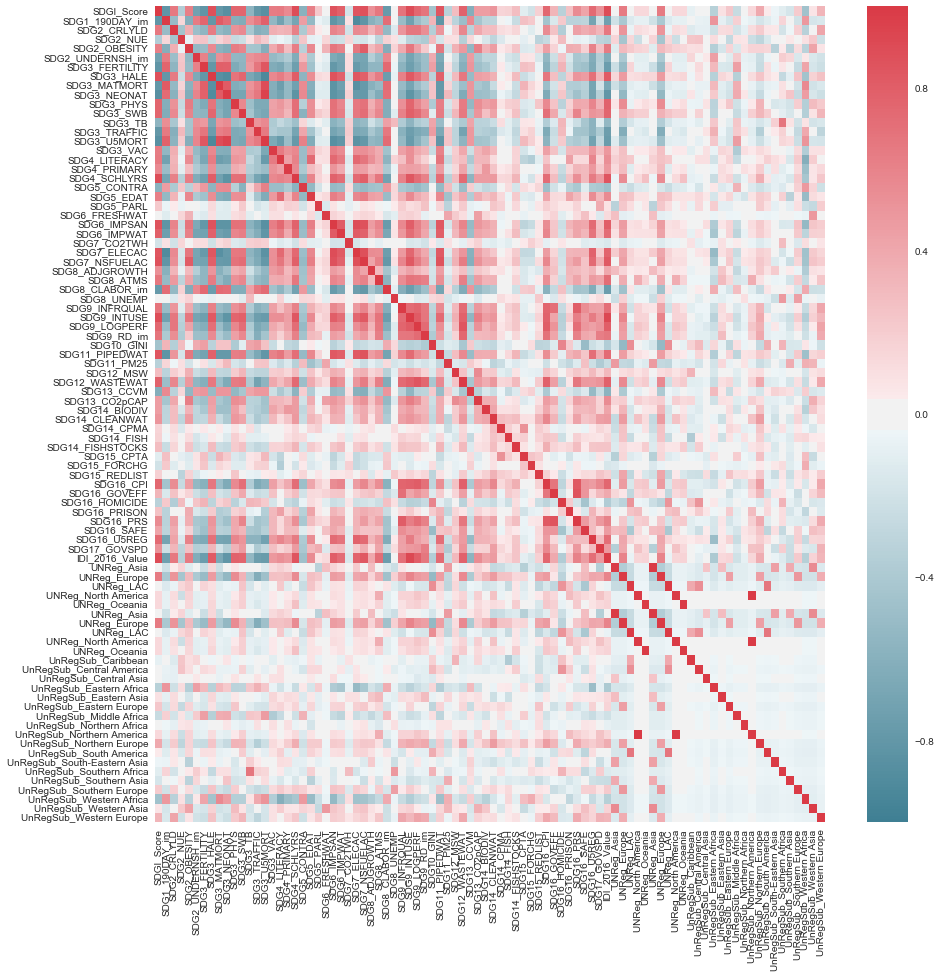

In [293]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(15,15))

correlations = data.corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)


In [294]:
#start cluster with 5 top variables (ideally based from Lasso) but in the meantime use eyeballs 
#this will require a new datasheet, import it and merge ICT and SDG data
#visualize, test with silhouette, run the matrix
#basically follow the beer example 
#but how would i get coefficients to other variables to tease out analysis as in this example http://res.cloudinary.com/general-assembly-profiles/image/upload/v1488557838/nd1h7mqjybjyucs5k4xe.pdf
#merge cluster results with region and gdp variables - perhaps as next steps 

In [295]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn import cross_validation 
from sklearn import feature_selection, linear_model

In [296]:
Y = data.IDI_2016_Value
mycopy = data.copy()
data.drop('IDI_2016_Value', axis=1, inplace=True)
X = data


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [298]:
mycopy


,GDP_2015,SDGI_Score,SDG1_190DAY_im,SDG2_CRLYLD,SDG2_NUE,SDG2_OBESITY,SDG2_UNDERNSH_im,SDG3_FERTILITY,SDG3_HALE,SDG3_MATMORT,...,UnRegSub_Northern America,UnRegSub_Northern Europe,UnRegSub_South America,UnRegSub_South-Eastern Asia,UnRegSub_Southern Africa,UnRegSub_Southern Asia,UnRegSub_Southern Europe,UnRegSub_Western Africa,UnRegSub_Western Asia,UnRegSub_Western Europe
0,594.3230812,36.50,13.973623,2.020600,0.768439,2.9,26.799999,51.900000,50.0,396.0,...,0,0,0,0,0,1,0,0,0,0
1,4101.472152,44.01,30.129999,0.888800,0.896844,10.2,14.200000,190.900000,44.0,477.0,...,0,0,0,0,0,0,0,0,0,0
2,3945.217582,60.77,1.060000,4.892600,0.897876,17.6,10.709333,19.700000,65.0,29.0,...,0,0,0,0,0,0,1,0,0,0
3,40438.76293,63.58,0.000000,3.453437,1.160181,37.2,5.000000,34.200000,67.0,6.0,...,0,0,0,0,0,0,0,0,1,0
4,13467.41564,66.82,0.000000,4.555000,0.340088,26.3,5.000000,68.100000,67.0,52.0,...,0,0,1,0,0,0,0,0,0,0
5,3489.12769,65.41,2.440000,3.026300,0.775167,19.5,5.800000,22.700000,62.0,25.0,...,0,0,0,0,0,0,0,0,1,0
6,56290.64681,74.53,0.000000,2.137200,0.721789,28.6,1.170000,14.200000,73.0,6.0,...,0,0,0,0,0,0,0,0,0,0
7,43636.7537,79.07,0.000000,7.246000,0.332474,18.4,1.170000,7.900000,71.0,4.0,...,0,0,0,0,0,0,0,0,0,1
8,5497.488414,61.34,0.000000,2.343700,0.698931,22.5,5.000000,47.200000,63.0,25.0,...,0,0,0,0,0,0,0,0,1,0
9,277.0683092,42.04,77.650002,1.329500,0.768439,2.6,10.709333,85.000000,48.0,712.0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
data.columns

Index([u'GDP_2015', u'SDGI_Score', u'SDG1_190DAY_im', u'SDG2_CRLYLD',
       u'SDG2_NUE', u'SDG2_OBESITY', u'SDG2_UNDERNSH_im', u'SDG3_FERTILITY',
       u'SDG3_HALE', u'SDG3_MATMORT', u'SDG3_NEONAT', u'SDG3_PHYS',
       u'SDG3_SWB', u'SDG3_TB', u'SDG3_TRAFFIC', u'SDG3_U5MORT', u'SDG3_VAC',
       u'SDG4_LITERACY', u'SDG4_PRIMARY', u'SDG4_SCHLYRS', u'SDG5_CONTRA',
       u'SDG5_EDAT', u'SDG5_PARL', u'SDG6_FRESHWAT', u'SDG6_IMPSAN',
       u'SDG6_IMPWAT', u'SDG7_CO2TWH', u'SDG7_ELECAC', u'SDG7_NSFUELAC',
       u'SDG8_ADJGROWTH', u'SDG8_ATMS', u'SDG8_CLABOR_im', u'SDG8_UNEMP',
       u'SDG9_INFRQUAL', u'SDG9_INTUSE', u'SDG9_LOGPERF', u'SDG9_RD_im',
       u'SDG10_GINI', u'SDG11_PIPEDWAT', u'SDG11_PM25', u'SDG12_MSW',
       u'SDG12_WASTEWAT', u'SDG13_CCVM', u'SDG13_CO2pCAP', u'SDG14_BIODIV',
       u'SDG14_CLEANWAT', u'SDG14_CPMA', u'SDG14_FISH', u'SDG14_FISHSTOCKS',
       u'SDG15_CPTA', u'SDG15_FORCHG', u'SDG15_REDLIST', u'SDG16_CPI',
       u'SDG16_GOVEFF', u'SDG16_HOMICIDE', u'SDG1

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [144]:
from sklearn import cross_validation 
import sklearn

X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,data_scaled, test_size=.33, random_state = 5)
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape 

(95, 83)
(48, 83)
(95, 83)
(48, 83)


In [145]:
lm2 = linear_model.Lasso()
lm2.fit(X_train,Y_train)

pred_train_lasso = lm2.predict(X_train)
pred_test_lasso = lm2.predict(X_test)

In [225]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Lasso(),
    cv=cross_validation.KFold(len(data_scaled), n_folds=5, shuffle=True),
    param_grid={'alpha': alphas},
    scoring='mean_squared_error')

gs.fit(data_scaled, Y)

/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/lib/python2.7/site-packages/sklearn/metrics/sc

GridSearchCV(cv=sklearn.cross_validation.KFold(n=143, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [226]:
len(data.columns)

84

In [231]:
sorted(zip(data.columns,gs.best_estimator_.coef_),key=lambda x : abs(x[1]))[::-1]

[('SDG9_INTUSE', 0.76625271145521068),
 ('SDG16_U5REG', 0.25285564341541195),
 ('SDGI_Score', 0.22711270530061381),
 ('SDG8_ATMS', 0.18437970129111428),
 ('SDG3_PHYS', 0.17847505571581751),
 ('SDG9_LOGPERF', 0.17357893163538632),
 ('SDG4_SCHLYRS', 0.14861708026869616),
 ('SDG7_NSFUELAC', 0.079798797083131187),
 ('SDG16_HOMICIDE', -0.065859753842083091),
 ('UnRegSub_Eastern Africa', -0.048343438230040933),
 ('SDG3_SWB', 0.039964855715039889),
 ('UNReg_Europe', 0.035972721730675832),
 ('SDG16_CPI', 0.033038568895061425),
 ('GDP_2015', 0.02701759663020608),
 ('SDG16_PRS', 0.025994488724559433),
 ('SDG12_WASTEWAT', 0.022905919024453634),
 ('UnRegSub_Southern Asia', -0.016571542650423023),
 ('SDG15_FORCHG', -0.015988724537749421),
 ('UnRegSub_Central Asia', 0.011075433493115201),
 ('UnRegSub_Western Europe', 0.0),
 ('UnRegSub_Western Asia', 0.0),
 ('UnRegSub_Western Africa', -0.0),
 ('UnRegSub_Southern Europe', 0.0),
 ('UnRegSub_Southern Africa', -0.0),
 ('UnRegSub_South-Eastern Asia', 0.0)

In [228]:
print -gs.best_score_

0.58355930028


In [229]:
print gs.best_estimator_

Lasso(alpha=0.10000000000000001, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [156]:
from sklearn import linear_model, metrics
lm2 = linear_model.Lasso().fit(data_scaled,Y)
print "~~~ Lasso ~~~"
print 'Lasso R2:', lm2.score(data_scaled,Y)

 ~~~ Lasso ~~~
Lasso R2: 0.65560413107


In [179]:
lm3 = linear_model.Ridge()
lm3.fit(X_train,Y_train)

pred_train_ridge = lm3.predict(X_train)
pred_test_ridge = lm3.predict(X_test)

In [213]:
alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Lasso(),
    cv=cross_validation.KFold(len(data_scaled), n_folds=5, shuffle=True),
    param_grid={'alpha': alphas},
    scoring='mean_squared_error')

gs.fit(data_scaled, Y)

/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda/lib/python2.7/site-packages/sklearn/metrics/sc

GridSearchCV(cv=sklearn.cross_validation.KFold(n=143, n_folds=5, shuffle=True, random_state=None),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [214]:
gs.best_score_

-0.6182977302414825

In [181]:
lm3 = linear_model.Ridge().fit(data_scaled,Y)
print "~~~ Ridge ~~~"
print 'Ridge R2:', lm3.score(data_scaled,Y)

~~~ Ridge ~~~
Ridge R2: 0.966161754252


In [215]:
sorted(zip(data.columns,gs.best_estimator_.coef_),key=lambda x : abs(x[1]))[::-1]

[('SDG9_INTUSE', 0.76625271145521068),
 ('SDG16_U5REG', 0.25285564341541195),
 ('SDGI_Score', 0.22711270530061381),
 ('SDG8_ATMS', 0.18437970129111428),
 ('SDG3_PHYS', 0.17847505571581751),
 ('SDG9_LOGPERF', 0.17357893163538632),
 ('SDG4_SCHLYRS', 0.14861708026869616),
 ('SDG7_NSFUELAC', 0.079798797083131187),
 ('SDG16_HOMICIDE', -0.065859753842083091),
 ('UnRegSub_Eastern Africa', -0.048343438230040933),
 ('SDG3_SWB', 0.039964855715039889),
 ('UNReg_Europe', 0.035972721730675832),
 ('SDG16_CPI', 0.033038568895061425),
 ('GDP_2015', 0.02701759663020608),
 ('SDG16_PRS', 0.025994488724559433),
 ('SDG12_WASTEWAT', 0.022905919024453634),
 ('UnRegSub_Southern Asia', -0.016571542650423023),
 ('SDG15_FORCHG', -0.015988724537749421),
 ('UnRegSub_Central Asia', 0.011075433493115201),
 ('UnRegSub_Western Europe', 0.0),
 ('UnRegSub_Western Asia', 0.0),
 ('UnRegSub_Western Africa', -0.0),
 ('UnRegSub_Southern Europe', 0.0),
 ('UnRegSub_Southern Africa', -0.0),
 ('UnRegSub_South-Eastern Asia', 0.0)

In [183]:
lm = linear_model.LinearRegression()
lm.fit(X_train,Y_train)

pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [186]:
lm = linear_model.LinearRegression().fit(data_scaled,Y)
print "~~~ Linear Regression ~~~"
print 'MSE of single model:', metrics.mean_squared_error(Y, lm.predict(data_scaled))
print 'LR R2:', lm.score(data_scaled,Y)

~~~ Linear Regression ~~~
MSE of single model: 0.157394652931
LR R2: 0.966786435801


In [187]:
sorted(zip(data.columns,lm.coef_),key=lambda x : abs(x[1]))[::-1]

[('UNReg_Asia', 3043436257091.8022),
 ('UNReg_Europe', 1910616625171.6748),
 ('UNReg_LAC', 1789935544486.062),
 ('UnRegSub_Western Asia', -1430149530999.1963),
 ('UnRegSub_Northern America', 1329554276239.7041),
 ('UnRegSub_South-Eastern Asia', -1168681660477.6323),
 ('UNReg_North America', -1078598471447.3741),
 ('UnRegSub_Southern Asia', -1038343501546.3522),
 ('UnRegSub_Eastern Asia', -793523825266.47009),
 ('UnRegSub_South America', -752504481909.75708),
 ('UnRegSub_Central Asia', -689679345954.72327),
 ('UnRegSub_Western Africa', 635084574760.69336),
 ('UnRegSub_Central America', -609318349394.80078),
 ('UnRegSub_Southern Europe', -596948289391.63757),
 ('UnRegSub_Eastern Africa', 592514472060.06958),
 ('UnRegSub_Eastern Europe', -549080804917.2417),
 ('UnRegSub_Northern Europe', -549080804917.0896),
 ('UnRegSub_Caribbean', -465653829100.70648),
 ('UnRegSub_Western Europe', -464546203722.53967),
 ('UnRegSub_Northern Africa', 392552038433.47559),
 ('UnRegSub_Middle Africa', 3925520

In [316]:
new_data = mycopy[['IDI_2016_Value','SDG3_MATMORT','SDG9_INTUSE','SDG2_UNDERNSH_im','SDG3_NEONAT','SDG3_U5MORT','SDG7_NSFUELAC']]

In [317]:
print new_data.shape


(143, 7)


In [318]:
new_data.isnull().sum()

IDI_2016_Value      0
SDG3_MATMORT        0
SDG9_INTUSE         0
SDG2_UNDERNSH_im    0
SDG3_NEONAT         0
SDG3_U5MORT         0
SDG7_NSFUELAC       0
dtype: int64

In [265]:
pd.DataFrame(Y).values

array([[ 1.73      ],
       [ 2.03      ],
       [ 4.92      ],
       [ 7.11      ],
       [ 6.52      ],
       [ 5.6       ],
       [ 8.19      ],
       [ 7.69      ],
       [ 6.28      ],
       [ 1.42      ],
       [ 7.83      ],
       [ 1.92      ],
       [ 1.8       ],
       [ 2.35      ],
       [ 6.69      ],
       [ 5.25      ],
       [ 7.26      ],
       [ 4.02      ],
       [ 5.99      ],
       [ 3.74      ],
       [ 4.17      ],
       [ 5.06051852],
       [ 7.62      ],
       [ 8.68      ],
       [ 6.35      ],
       [ 5.19      ],
       [ 5.06051852],
       [ 2.16      ],
       [ 5.16      ],
       [ 5.06051852],
       [ 6.3       ],
       [ 6.53      ],
       [ 7.25      ],
       [ 8.31      ],
       [ 8.74      ],
       [ 5.06051852],
       [ 4.4       ],
       [ 4.56      ],
       [ 4.44      ],
       [ 7.62      ],
       [ 8.07      ],
       [ 1.51      ],
       [ 8.08      ],
       [ 8.11      ],
       [ 3.12      ],
       [ 8

In [267]:
scaler.fit_transform(Y).shape

/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


(143,)

In [269]:
scaler = StandardScaler()


scaled_data_with_label = np.hstack((data_scaled,pd.DataFrame(scaler.fit_transform(Y)).values))


/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [328]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [332]:
km.labels_

array([2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2,
       0, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 2], dtype=int32)

In [333]:
new_data['cluster'] = km.labels_
new_data.sort('cluster')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,IDI_2016_Value,SDG3_MATMORT,SDG9_INTUSE,SDG2_UNDERNSH_im,SDG3_NEONAT,SDG3_U5MORT,SDG7_NSFUELAC,cluster
72,8.840000,11.0,84.33,5.000000,1.6,3.400000,95.00000,0
83,5.750000,23.0,46.60,10.709333,11.9,15.800000,88.97903,0
82,4.600000,121.0,56.80,5.000000,17.6,27.600000,95.00000,0
81,7.080000,18.0,75.83,1.170000,5.2,7.900000,94.77204,0
80,8.360000,10.0,94.67,1.170000,0.9,1.900000,95.00000,0
79,7.100000,10.0,72.13,1.170000,2.5,5.200000,93.09140,0
77,3.770000,30.0,25.80,22.000000,5.4,9.800000,25.39852,0
75,5.930000,15.0,74.70,5.000000,4.8,8.300000,95.00000,0
73,6.540000,4.0,78.70,5.000000,3.2,8.600000,95.00000,0
131,5.180000,20.0,34.89,7.400000,6.7,12.300000,73.86841,0


In [336]:
new_data.groupby('cluster').mean()


,IDI_2016_Value,SDG3_MATMORT,SDG9_INTUSE,SDG2_UNDERNSH_im,SDG3_NEONAT,SDG3_U5MORT,SDG7_NSFUELAC
cluster,,,,,,,
0,6.156279,39.178218,59.506436,6.39963,6.982178,12.928713,83.387279
1,2.580889,749.923077,8.904615,18.00841,31.923077,97.453846,10.216855
2,2.557259,330.275862,15.218966,21.80377,25.772414,64.651724,24.900274


In [337]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

In [338]:
colors

array(['red', 'green', 'blue', 'yellow'], 
      dtype='|S6')

In [339]:

# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
#pd.scatter_matrix(X, c=colors[list(new_data.cluster)], figsize=(10,10), s=100)

In [340]:
#from sklearn import metrics
#metrics.silhouette_score(new_data, km.labels_)

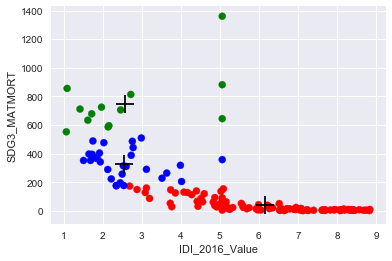

In [341]:
centers = new_data.groupby('cluster').mean()
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(new_data.IDI_2016_Value, new_data.SDG3_MATMORT, c=colors[list(new_data.cluster)], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.IDI_2016_Value, centers.SDG3_MATMORT, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('IDI_2016_Value')
plt.ylabel('SDG3_MATMORT')




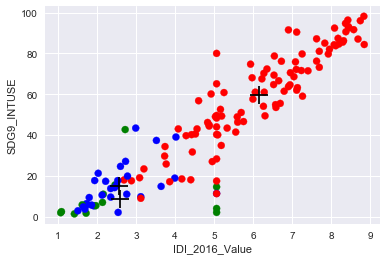

In [343]:
centers = new_data.groupby('cluster').mean()
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(new_data.IDI_2016_Value, new_data.SDG9_INTUSE, c=colors[list(new_data.cluster)], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.IDI_2016_Value, centers.SDG9_INTUSE, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('IDI_2016_Value')
plt.ylabel('SDG9_INTUSE')



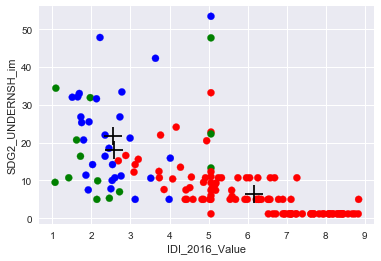

In [346]:
centers = new_data.groupby('cluster').mean()
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(new_data.IDI_2016_Value, new_data.SDG2_UNDERNSH_im, c=colors[list(new_data.cluster)], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.IDI_2016_Value, centers.SDG2_UNDERNSH_im, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('IDI_2016_Value')
plt.ylabel('SDG2_UNDERNSH_im')



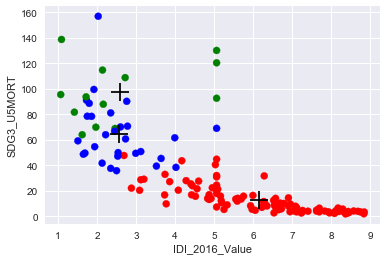

In [355]:
centers = new_data.groupby('cluster').mean()
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(new_data.IDI_2016_Value, new_data.SDG3_U5MORT, c=colors[list(new_data.cluster)], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.IDI_2016_Value, centers.SDG3_U5MORT, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('IDI_2016_Value')
plt.ylabel('SDG3_U5MORT')

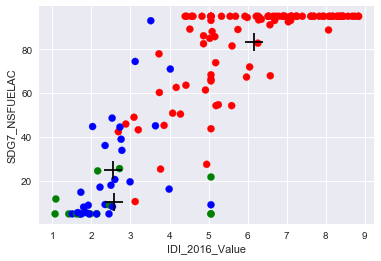

In [356]:
centers = new_data.groupby('cluster').mean()
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(new_data.IDI_2016_Value, new_data.SDG7_NSFUELAC, c=colors[list(new_data.cluster)], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.IDI_2016_Value, centers.SDG7_NSFUELAC, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('IDI_2016_Value')
plt.ylabel('SDG7_NSFUELAC')

In [358]:
centers = new_data.groupby('cluster').mean()
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(new_data.IDI_2016_Value, new_data.SDGI_Score, c=colors[list(new_data.cluster)], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.IDI_2016_Value, centers.SDGI_Score, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('IDI_2016_Value')
plt.ylabel('SDGI_Score')

AttributeError: 'DataFrame' object has no attribute 'SDGI_Score'

In [347]:
from sklearn import metrics
metrics.silhouette_score(new_data, km.labels_)

0.68399092238790271

In [352]:
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(new_data)
    scores.append(metrics.silhouette_score(new_data, km.labels_))

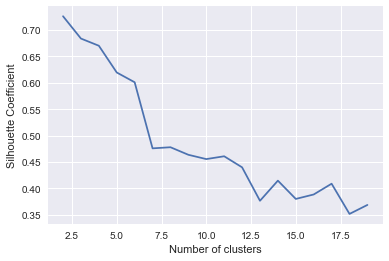

In [354]:

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [ ]:
SDG3_MATMORT', 0.69071105651462106),
 ('SDG9_INTUSE', 0.45856603506802035),
 ('SDG2_UNDERNSH_im', 0.45065843647017201),
 ('SDG3_NEONAT', 0.43549190211505295),
 ('SDG3_U5MORT', -0.36838656494039584),
 ('SDGI_Score', 0.36099800865240977),
 ('SDG7_NSFUELAC', 0.34860967871452292),